# ANOVA with Gender and Age Groups



In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
from IPython.display import display
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [7]:
data = pd.read_csv("Data/data_clean.csv", index_col = [0])


#Updating age group 
# data.loc[(data['age'] > 14) & (data['age'] <= 24), 'Age_Group'] = 1 #'Youth (15-24)'
# data.loc[(data['age'] > 25) & (data['age'] <= 64), 'Age_Group'] = 2 #'Adults (25-64)'
# data.loc[(data['age'] >= 65), 'Age_Group'] = 3 # 'Seniors (65+)'

data.loc[(data['age'] < 18), 'Age_Group'] = 1 #Under 18 

#Creating more evenly divided age groups
# https://www.formpl.us/blog/age-survey-questions
data.loc[(data['age'] < 18), 'Age_Group'] = 1 #Under 18
data.loc[(data['age'] >= 18) & (data['age'] <= 24), 'Age_Group'] = 2 # 18-24
data.loc[(data['age'] >= 25) & (data['age'] <= 34), 'Age_Group'] = 3 # 25-34
data.loc[(data['age'] >= 35) & (data['age'] <= 44), 'Age_Group'] = 4 # 35-44
data.loc[(data['age'] >= 45) & (data['age'] <= 54), 'Age_Group'] = 5 # 45-54
data.loc[(data['age'] >= 55) & (data['age'] <= 64), 'Age_Group'] = 6 # 55-64
data.loc[(data['age'] >= 65), 'Age_Group'] = 7 #65+


# Making Gender Categorical
#data["gender"].replace({1:"Male", 2: "Female", 3: "Other"}, inplace = True)
data = data.dropna()
data.to_csv("Data/data_AgeGroup.csv")
data.head()

,score,Influence,Modesty,Daring,Confidence,Ruling,Responsibility,IntrovExtro,Success,Humble,...,MakeBelieve,Leadership Origin,Biography,Public Opinion,Capability,Extraordinary,elapse,gender,age,Age_Group
0,18,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,211,1,50,5.0
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,149,1,40,4.0
2,27,1,0,0,0,1,1,1,1,1,...,1,1,1,0,1,1,168,1,28,3.0
3,29,1,1,0,1,1,1,1,1,0,...,1,1,0,0,1,0,230,1,37,4.0
4,19,1,0,0,0,1,1,0,1,1,...,0,1,0,0,0,1,361,1,27,3.0


In [11]:
display(px.scatter(data, x = 'Age_Group', y = 'score', color = 'gender'))
#pd.crosstab(data["score"], data["Age_Group"])

In [12]:
display(px.box(data, x = 'Age_Group', y = 'score', color = 'gender'))
pd.crosstab(data["score"], data["Age_Group"])

Age_Group,1.0,2.0,3.0
score,,,
0,8,54,3
1,34,173,13
2,42,215,12
3,78,261,15
4,96,315,21
5,101,346,25
6,143,379,17
7,131,343,16
8,151,386,16


### Checking Assumptions for ANOVA
If one of the assumptions of normality or equal variance is violated, we cannot perform the Two Factor ANOVA test for our data analysis. The next steps would be to re-evaluate the dataset and examine any missed outliers skewing our data excessively and/or any data transformations.

#### Interaction Effects

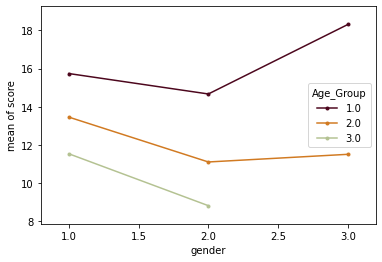

In [13]:
# Make an interaction plot
fig = interaction_plot(x=data['gender'], trace=data['Age_Group'], response=data['score'], 
    colors=['#4c061d','#d17a22', '#b4c292'])

Since none of the lines touch each other, there is no sign of an interaction effect between gender and age group.

#### Normality

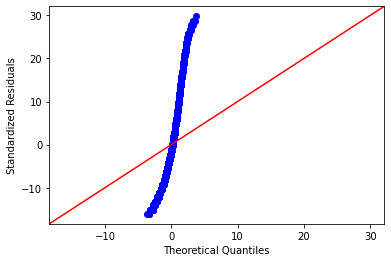

In [14]:
import matplotlib.pyplot as plt

model = ols('score ~ C(Age_Group) + C(gender)', data=data).fit()
sm.qqplot(model.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

The points don't follow the line at all, with large quantiles (positive and negative) indicating heavy tails in the data's distribution. The data violates the normality assumption.

### Box Cox Transformation (Method #1)
We will try performing a BoxCox transformation of the non-normal dependent variable (score) in an effort to improve the data's compliance to the normality assumption.

In [15]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data['score'])

ValueError: Data must be positive.

The above error is a result of the parameter restriction for x, which has to be a positive 1-dimensional input array. Since the `score` column (dependent variable) contains 0s, we cannot use scipy.stats.boxcox. However, there is a workaround using scipy.special.boxcox1p, which works on an x input array containing 0s (does the calculation 1+x). A disadvantage is that in addition to the data (input array), one of its input parameters requires lambda. Since we do not know the optimal lambda value, we would have to trial-and-error different lambda values for our data's compliance with the normality assumption.

In [ ]:
import scipy
from scipy.special import boxcox1p
transformed_data = scipy.special.boxcox1p(data['score'], 0.6)
data.insert(1,'score_bc', transformed_data)
data.head()

### Rechecking Assumptions for ANOVA

#### Interaction Effects

In [ ]:
# Make an interaction plot
fig = interaction_plot(x=data['gender'], trace=data['Age_Group'], response=data['score_bc'], 
    colors=['#4c061d','#d17a22', '#b4c292'])

Since none of the lines touch each other, there is no sign of an interaction effect between gender and age group.

#### Normality

In [ ]:
model = ols('score_bc ~ C(Age_Group) + C(gender)', data=data).fit()
sm.qqplot(model.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

While using scipy.stats.boxcox slightly improved our data's compliance to the normality assumption, it barely holds. This could be due to many reasons, one being that we did not choose the optimal lambda value for the BoxCox transformation. To resolve this doubt, we can use the PowerTransformer from sklearn.preprocessing to find the optimal lambda value, as well as transform our data accordingly.

### BoxCox Transformation (Method #2)

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
score_df = pd.DataFrame(data['score'])
pt.fit(score_df)
print(pt.lambdas_) # optimal lambda value

The above output is the optimal lambda value for the Box Cox transformation of our data. We will use it to transform the `score` column and update our model.

In [ ]:
transformed_data = pt.transform(score_df)
data.insert(2,'score_bc2', transformed_data)
data.head()

### Rechecking Assumptions for ANOVA

#### Interaction Effects

In [ ]:
# Make an interaction plot
fig = interaction_plot(x=data['gender'], trace=data['Age_Group'], response=data['score_bc2'], 
    colors=['#4c061d','#d17a22', '#b4c292'])

Since none of the lines touch each other, there is no sign of an interaction effect between gender and age group.

#### Normality

In [ ]:
model3 = ols('score_bc2 ~ C(Age_Group) + C(gender)', data=data).fit()
sm.qqplot(model3.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In general, the points seem to fall into a relatively tight, straight line on the plot. Points at both ends of the y=x line deviate slightly; however, they are not significant enough to put the normality assumption into question.

#### Shapiro-Wilk's Test
We will also perform a Shapiro-Wilk's test to quantify the ability to accept/reject the normality assumption.

In [ ]:
w, pvalue = stats.shapiro(model3.resid)
print(w, pvalue)

Since the p-value of 1.816347094431292e-13 is less than $\alpha$ = 0.05, we reject the null hypothesis. There is stiatistically significant evidence to suggest that the normality assumption does not hold. While this contradicts our findings from the residuals plot, we can also use a histogram to visualize that the residuals are approximately normally distributed.

In [ ]:
plt.hist(model3.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Thus, we will assume that the normality assumption holds. (lmfao)

#### Homoscedasticity

#### Levene's Test

#### Multiple Pairwise Comparisons (Post-Hoc)

After checking the ANOVA assumptions, we may now proceed with the Two-Factor ANOVA Test.

### Two-Factor ANOVA Test

#### Model Summary

In [ ]:
display(model3.summary())

#### ANOVA Test

In [ ]:
anova_table = sm.stats.anova_lm(model3, typ=2)
anova_table

In [ ]:
# stats.kruskal(data['gender'], data['Age_Group'], data['score_bc2']) #hello